In [2]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time


sys.path.append("../")
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit
import fitter.special_functions as sf

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [3]:
from importlib import reload
reload(fm)
reload(dl)
reload(fit)

<module 'fitter.fitter' from '../fitter/fitter.py'>

### Title

In [4]:
params = {
    'collection_name' : 'test', 
    
    'model_info' : {
        'fit_type' : 'poly', # 'ma', 'ma-ratio', 'xpt', 'xpt-ratio', or 'poly'
        'order' : 'nlo', # 'nlo', 'n2lo', 'n3lo'
        'latt_ct' : 'nlo',
        'F2' : 'FKFK', #'FKFpi', 'FpiFpi', 'FKFK', 'F0F0' (HPQCD choice)

        'include_FV' : False, # max 10
        'exclude' : [], # put LECs here
        'use_bijnens_central_value' : True,
        
        # semi-nnlo corrections
        'include_alpha_s' : False,
        'include_log' : False, 
        'include_log2' : False,
        'include_sunset' : False,
    }, 

    'fast_susnet' : True,
    'use_prior' : False,
    'bias_correct' : True,
    #'include_su2_isospin_corrrection' : False,
    
    'abbrs' : [u'a06m310L', u'a09m135',  u'a09m220', u'a09m310', u'a09m350', u'a09m400', u'a12m130',
           u'a12m220',  u'a12m220S', u'a12m220L', u'a12m310', u'a12m350',
           u'a12m400',  u'a15m135XL', u'a15m220', u'a15m310', u'a15m350', 'a15m400'], # u'a15m130'
}

In [5]:
t0 = time.time()

# Load data
data_loader = dl.data_loader()
fit_data = data_loader.get_fit_data()
phys_point_data = data_loader.get_phys_point_data()
params['model_info']['name'] = data_loader.get_model_name_from_model_info(params['model_info'])


# Make bootstrapper
fit_manager = fm.fit_manager(fit_data, phys_point_data, prior=None, **params)

new_prior = fit_manager.create_prior_from_fit()
#data_loader.save_prior(new_prior, bootstrapper.get_name())
    
t1 = time.time()

print("\nTotal time (s): ", t1 - t0, "\n")

Using default prior.
1   {'chiral_nlo': 1.0}
2   {'chiral_nlo': 2.0}
3   {'chiral_nlo': 0.01}
4   {'chiral_nlo': 1.5}
5   {'chiral_nlo': 0.5}
6   {'chiral_nlo': 1.25}
7   {'chiral_nlo': 0.75}
8   {'chiral_nlo': 1.12}
9   {'chiral_nlo': 1.25}
10   {'chiral_nlo': 1.06}
11   {'chiral_nlo': 1.19}
12   {'chiral_nlo': 1.09}
13   {'chiral_nlo': 1.06}
14   {'chiral_nlo': 1.11}
15   {'chiral_nlo': 1.11}
{'chiral_nlo': 1.11}

Total time (s):  4.2304527759552 



In [6]:
print(fit_manager)
fit_manager.plot_fit('mpi');


Model: poly_FKFK_nlo_bijnens

Fitted/[FLAG] values at physical point:
	F_K / F_pi = 1.1303(13) [1.1946(19)]	(delta_su2 = -0.00241(64))

Parameters:
            A_x     1.1008 (35)      [     0.0 (1.1) ]  

Least Square Fit:
  chi2/dof [dof] = 94 [18]    Q = 0    logGBF = -752.13

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 1/0.2)

Error Budget (relative error):
  disc      -0.0e+00
  chiral     1.2e-06
  pp_input   1.0e-03
  stat       3.7e-04



In [7]:
fit_manager.plot_parameters(xparam='A_x', show_posterior=True);

In [8]:
fit_manager.plot_parameters(xparam='A_x', show_prior=True);

Making fit...
Done!
Time (s):  0.5307419300079346

Model: poly_FKFK_nlo_bijnens

Fitted/[FLAG] values at physical point:
	F_K / F_pi = 1.367(13) [1.1986(20)]	(delta_su2 = -0.00904(97))

Parameters:
            A_x     11.545 (16)      [     2.40 (50) ]  *****
            A_a      -6.03 (33)      [     2.24 (50) ]  *****

Least Square Fit:
  chi2/dof [dof] = 2.4e+03 [18]    Q = 0    logGBF = -21092

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 10/0.5)

Error Budget (relative error):
  disc       8.3e-04
  chiral     4.7e-05
  pp_input   9.1e-03
  stat       1.2e-03



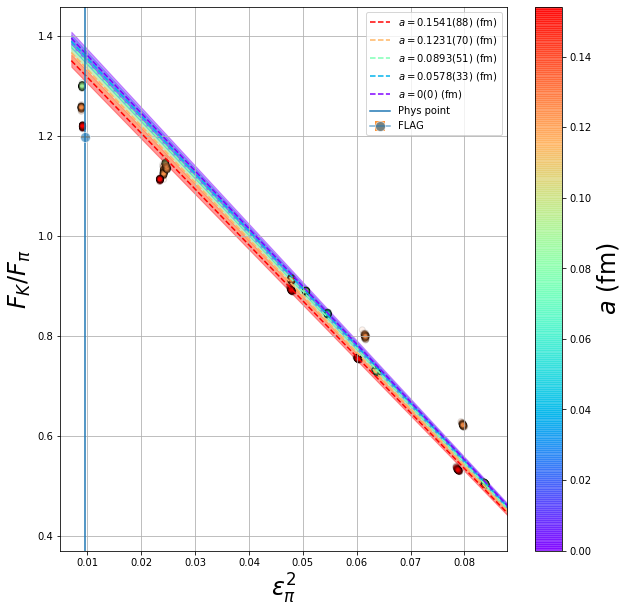

In [119]:
prior = new_prior

# nlo polynomial
prior['A_x'] = gv.gvar('2.4 (0.5) ')

# Lattice spacing terms
prior['A_a'] = gv.gvar('2.24 (50)')#gv.gvar('0.0(5.0)')
prior['A_aa'] = gv.gvar('0.0(1000.0)')#gv.gvar('0.0(50.0)')
prior['A_aaa'] = gv.gvar('0.0(10000.0)')#gv.gvar('0.0(50.0)')

# n2lo terms
prior['A_k'] = gv.gvar('100(100)')#gv.gvar('0.0(5.0)')
prior['A_p'] = gv.gvar('-100(100)')#gv.gvar('0.0(5.0)')

# n3lo terms
prior['A_ak'] = gv.gvar('0.0(100.0)')
prior['A_ap'] = gv.gvar('0.0(100.0)')
prior['A_kk'] = gv.gvar('0.0(100.0)')
prior['A_kp'] = gv.gvar('0.0(100.0)')
prior['A_pp'] = gv.gvar('0.0(100.0)')

fit_data = data_loader.get_fit_data()
phys_point_data = data_loader.get_phys_point_data()
params['model_info']['name'] = data_loader.get_model_name_from_model_info(params['model_info'])


# Make bootstrapper
fit_manager = fm.fit_manager(fit_data, phys_point_data, prior=prior, **params)
print(fit_manager)
fit_manager.plot_fit('mpi')

In [ ]:
print(fit_manager)
fit_manager.plot_fit('mpi')


Model: poly_FKFK_n3lo_a4_a6_FV_bijnens

Fitted/[FLAG] values at physical point:
	F_K / F_pi = 1.230(10) [1.1963(20)]	(delta_su2 = -0.00520(78))

Parameters:
            A_x         17 (10)      [       0 (390) ]  
            A_k         7 (158)      [      0 (1000) ]  
            A_p        276 (53)      [      0 (1000) ]  
            A_a       -176 (47)      [       0 (214) ]  
           A_aa         84 (46)      [       0 (169) ]  
           A_ak      1253 (378)      [       0 (760) ]  *
           A_ap      -228 (121)      [       0 (760) ]  
           A_kk      -474 (615)      [       0 (760) ]  
           A_kp     -1716 (421)      [       0 (760) ]  **
           A_pp       1088 (85)      [       0 (760) ]  *
          A_aaa         8 (493)      [       0 (493) ]  

Least Square Fit:
  chi2/dof [dof] = 1.8 [18]    Q = 0.025    logGBF = 33.398

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 28/0.8)

Error Budget (relative error):
  disc: 0.0009

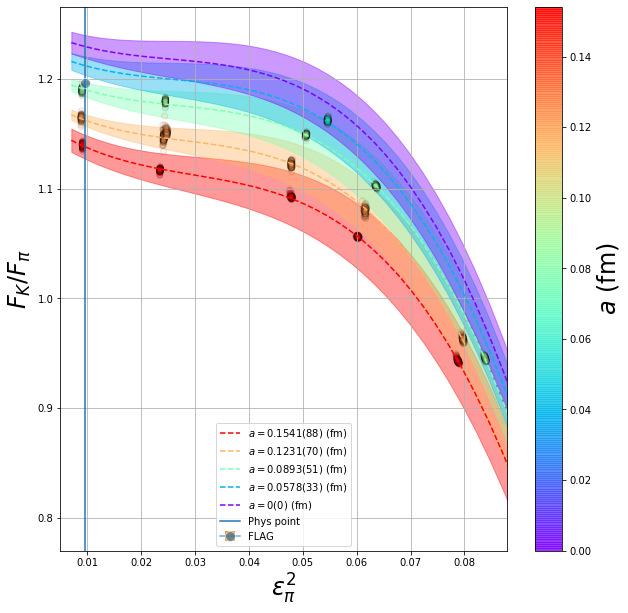

In [35]:
print(fit_manager)
fit_manager.plot_fit('mpi')

In [24]:
print(fit_manager)


Model: poly_FKFK_n3lo_a4_FV_bijnens

Fitted/[FLAG] values at physical point:
	F_K / F_pi = 1.1694(78) [1.1953(19)]	(delta_su2 = -0.00351(70))

Parameters:
            A_x       9.7 (6.1)      [      0 (1030) ]  
            A_k         48 (92)      [      0 (1000) ]  
            A_p         75 (34)      [      0 (1000) ]  
            A_a         21 (32)      [      0 (1550) ]  
           A_aa         16 (40)      [       0 (746) ]  
           A_ak      -183 (254)      [       0 (413) ]  
           A_ap        -86 (82)      [       0 (413) ]  
           A_kk      -393 (352)      [       0 (413) ]  
           A_kp      -260 (274)      [       0 (413) ]  
           A_pp        667 (69)      [       0 (413) ]  *

Least Square Fit:
  chi2/dof [dof] = 5 [18]    Q = 2e-11    logGBF = 3.332

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 94/2.3)

Error Budget (relative error):
  disc: 0.000134
  chiral: 0.00214
  pp_input: 0.00312
  stat: 0.00551



In [21]:
print(fit_manager)


Model: poly_FKFK_n2lo_FV_bijnens

Fitted/[FLAG] values at physical point:
	F_K / F_pi = 1.22(19) [1.1961(37)]	(delta_su2 = -0.0049(53))

Parameters:
            A_x       -149 (38)      [        0 (84) ]  *
            A_k      1268 (306)      [       0 (545) ]  **
            A_p       -326 (94)      [       0 (545) ]  
            A_a       -218 (48)      [       0 (140) ]  *

Least Square Fit:
  chi2/dof [dof] = 15 [18]    Q = 7.5e-48    logGBF = -113.89

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10)    (itns/time = 1*/0.2)

Error Budget (relative error):
  disc: 0.00368
  chiral: 0.00551
  pp_input: 0.15
  stat: 0.0317



In [125]:
print(fit_manager.fmt_error_budget())

Partial Errors:
                  FK/Fpi
------------------------
          A_a:   0.00036
         A_aa:   0.00005
        A_aaa:   0.00041
         A_ak:   0.00000
         A_ap:   0.00001
          A_k:   0.00001
         A_kk:   0.00000
         A_kp:   0.00000
          A_p:   0.00001
         A_pp:   0.00001
          L_4:   0.00003
          L_5:   0.00004
     phys:mpi:   0.00013
      phys:mk:   0.00021
phys:lam2_chi:   0.00127
         stat:   0.00294
------------------------
        total:   0.00326

